## Introduction

A blog (a truncation of "weblog") is an informational website consisting of discrete, often informal diary-style text entries (posts). Posts are typically displayed in reverse chronological order so that the most recent post appears first, at the top of the web page.

An author is the creator of an original work, whether that work is in written, graphic, or recorded medium. The creation of such a work is an act of authorship.

Several texts are written on the internet in the form of articles, blogs, etc. This is the reason it has now become difficult to predict anything about the writer/ author without knowing him. We will try solving this problem by building a classifier that would be able to predict multiple features such as Age, Gender, Astrological sign and Industry about the author from his texts. This problem is also listed as “Blog Authorship Corpus” on Kaggle.s/

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
import warnings
warnings.filterwarnings('ignore')

Load the dataset

In [53]:
from google.colab import drive
drive.mount('/gdrive')
df = pd.read_csv('/gdrive/My Drive/Colab/BlogAuthor/blogtext.csv', nrows= 10000)
df

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...
...,...,...,...,...,...,...,...
9995,1705136,female,25,indUnk,Pisces,"19,May,2004",take me home with you forever where I ...
9996,1705136,female,25,indUnk,Pisces,"23,June,2004",seductive secretness behind doors warn...
9997,1705136,female,25,indUnk,Pisces,"21,June,2004",For being so kind to me when I need yo...
9998,1705136,female,25,indUnk,Pisces,"09,June,2004",blurry outside sounds as people mingle...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10000 non-null  int64 
 1   gender  10000 non-null  object
 2   age     10000 non-null  int64 
 3   topic   10000 non-null  object
 4   sign    10000 non-null  object
 5   date    10000 non-null  object
 6   text    10000 non-null  object
dtypes: int64(2), object(5)
memory usage: 547.0+ KB


In [ ]:
df.isnull().sum()

,0
id,0
gender,0
age,0
topic,0
sign,0
date,0
text,0


In [54]:
df.duplicated().sum()

18

In [55]:
df.drop_duplicates(inplace=True)

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='gender', ylabel='count'>

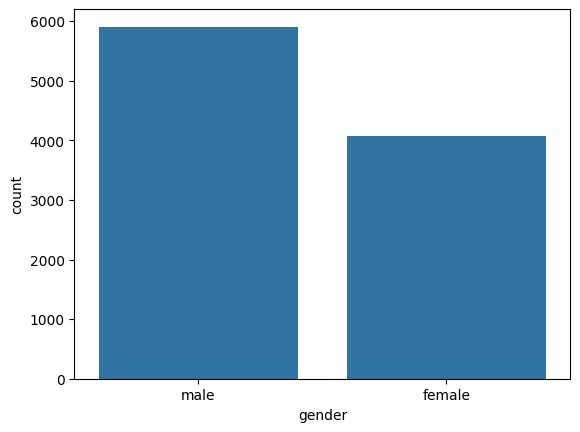

In [57]:
sns.countplot(x='gender',data= df)

## Text Preprocessing

In [58]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [59]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def preprocess_text(text):

    # Remove unwanted characters (retain only letters and spaces)
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Convert text to lowercase
    text = text.lower()

    # Remove unwanted spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)

    return text

In [60]:
import re

In [61]:
df['clean_text'] = df['text'].apply(preprocess_text)
df

,id,gender,age,topic,sign,date,text,clean_text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,...",info found pages mb pdf files wait untill team...
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...,team members drewes van der laag urllink mail ...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...,het kader van kernfusie op aarde maak je eigen...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!,testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...,thanks yahoos toolbar capture urls popupswhich...
...,...,...,...,...,...,...,...,...
9995,1705136,female,25,indUnk,Pisces,"19,May,2004",take me home with you forever where I ...,take home forever may rest sleep arms forgotte...
9996,1705136,female,25,indUnk,Pisces,"23,June,2004",seductive secretness behind doors warn...,seductive secretness behind doors warning neve...
9997,1705136,female,25,indUnk,Pisces,"21,June,2004",For being so kind to me when I need yo...,kind need holding hand petting hair cry bring ...
9998,1705136,female,25,indUnk,Pisces,"09,June,2004",blurry outside sounds as people mingle...,blurry outside sounds people mingle pass darkn...


As we want to make this into a multi-label classification problem, we will merge all the label columns together, so that we have all the labels together for a particular sentence

Label columns to merge: “gender”, “age”, “topic”, “sign”

In [62]:
df['labels'] = df.apply(lambda col : [col['gender'],col['age'],col['topic'],col['sign']], axis=1)
merged_data = df.drop(labels =['date','gender', 'age','topic','sign','id'], axis = 1)
merged_data

,text,clean_text,labels
0,"Info has been found (+/- 100 pages,...",info found pages mb pdf files wait untill team...,"[male, 15, Student, Leo]"
1,These are the team members: Drewe...,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,In het kader van kernfusie op aarde...,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,testing!!! testing!!!,testing testing,"[male, 15, Student, Leo]"
4,Thanks to Yahoo!'s Toolbar I can ...,thanks yahoos toolbar capture urls popupswhich...,"[male, 33, InvestmentBanking, Aquarius]"
...,...,...,...
9995,take me home with you forever where I ...,take home forever may rest sleep arms forgotte...,"[female, 25, indUnk, Pisces]"
9996,seductive secretness behind doors warn...,seductive secretness behind doors warning neve...,"[female, 25, indUnk, Pisces]"
9997,For being so kind to me when I need yo...,kind need holding hand petting hair cry bring ...,"[female, 25, indUnk, Pisces]"
9998,blurry outside sounds as people mingle...,blurry outside sounds people mingle pass darkn...,"[female, 25, indUnk, Pisces]"


Separating features and labels, and split the data into training and testing

In [63]:
X = merged_data.clean_text
y = merged_data.labels

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 43)

In [64]:
y.value_counts().head()

,count
labels,
"[male, 35, Technology, Aries]",2288
"[male, 36, Fashion, Aries]",1616
"[female, 27, indUnk, Taurus]",605
"[female, 17, indUnk, Scorpio]",556
"[female, 34, indUnk, Sagittarius]",530


## Vectorize the features

In [65]:
vectorizer = CountVectorizer(min_df = 2,ngram_range = (1,2),stop_words = "english")

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [66]:
label_counts=dict()

for labels in df.labels.values:
    for label in labels:
        if label in label_counts:
            label_counts[str(label)]+=1
        else:
            label_counts[str(label)]=1

In [67]:
label_counts

{'male': 5906,
 '15': 1,
 'Student': 1136,
 'Leo': 301,
 '33': 1,
 'InvestmentBanking': 70,
 'Aquarius': 569,
 'female': 4076,
 '14': 1,
 'indUnk': 3279,
 'Aries': 4192,
 '25': 1,
 'Capricorn': 215,
 '17': 1,
 'Gemini': 150,
 '23': 1,
 'Non-Profit': 71,
 'Cancer': 504,
 'Banking': 16,
 '37': 1,
 'Sagittarius': 1093,
 '26': 1,
 '24': 1,
 'Scorpio': 967,
 '27': 1,
 'Education': 269,
 '45': 1,
 'Engineering': 127,
 'Libra': 491,
 'Science': 63,
 '34': 1,
 '41': 1,
 'Communications-Media': 99,
 'BusinessServices': 90,
 'Sports-Recreation': 80,
 'Virgo': 235,
 'Taurus': 812,
 'Arts': 45,
 'Pisces': 453,
 '44': 1,
 '16': 1,
 'Internet': 118,
 'Museums-Libraries': 17,
 'Accounting': 4,
 '39': 1,
 '35': 1,
 'Technology': 2647,
 '36': 1,
 'Law': 11,
 '46': 1,
 'Consulting': 21,
 'Automotive': 14,
 '42': 1,
 'Religion': 9,
 '13': 1,
 'Fashion': 1622,
 '38': 1,
 '43': 1,
 'Publishing': 4,
 '40': 1,
 'Marketing': 156,
 'LawEnforcement-Security': 10,
 'HumanResources': 2,
 'Telecommunications': 2}

Transforming the labels

As we have noticed before, in this task each example can have multiple tags. To deal with such kind of
prediction, we need to transform labels in a binary form and the prediction will be a mask of 0s and 1s.
For this purpose, it is convenient to use MultiLabelBinarizer from sklearn

In [68]:
binarizer=MultiLabelBinarizer(classes=sorted(label_counts.keys()))

y_train = binarizer.fit_transform(y_train)
y_test = binarizer.transform(y_test)

In [70]:
# Display the transformed labels and classes

print("Training Labels (Binary):\n", y_train)
print("\nTesting Labels (Binary):\n", y_test)
print("\nClasses:\n", binarizer.classes_)

Training Labels (Binary):
 [[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]

Testing Labels (Binary):
 [[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 1 1 0]]

Classes:
 ['13' '14' '15' '16' '17' '23' '24' '25' '26' '27' '33' '34' '35' '36'
 '37' '38' '39' '40' '41' '42' '43' '44' '45' '46' 'Accounting' 'Aquarius'
 'Aries' 'Arts' 'Automotive' 'Banking' 'BusinessServices' 'Cancer'
 'Capricorn' 'Communications-Media' 'Consulting' 'Education' 'Engineering'
 'Fashion' 'Gemini' 'HumanResources' 'Internet' 'InvestmentBanking' 'Law'
 'LawEnforcement-Security' 'Leo' 'Libra' 'Marketing' 'Museums-Libraries'
 'Non-Profit' 'Pisces' 'Publishing' 'Religion' 'Sagittarius' 'Science'
 'Scorpio' 'Sports-Recreation' 'Student' 'Taurus' 'Technology'
 'Telecommunications' 'Virgo' 'female' 'indUnk' 'male']


Using a linear classifier, wrap it up in OneVsRestClassifier to train it on every label

In [71]:
clf = LogisticRegression(solver = 'lbfgs',max_iter = 1000)
clf = OneVsRestClassifier(clf)
clf.fit(X_train,y_train)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

Predictions and Accuracy

In [74]:
y_pred = clf.predict(X_test)

In [78]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

def display_metrics_micro(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: Micro', f1_score(Ytest, Ypred, average='micro'))
    print('Average precision score: Micro', average_precision_score(Ytest, Ypred, average='micro'))
    print('Average recall score: Micro', recall_score(Ytest, Ypred, average='micro'))

def display_metrics_macro(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: Macro', f1_score(Ytest, Ypred, average='macro'))
    print('Average precision score: Macro', average_precision_score(Ytest, Ypred, average='macro'))
    print('Average recall score: Macro', recall_score(Ytest, Ypred, average='macro'))

def display_metrics_weighted(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: weighted', f1_score(Ytest, Ypred, average='weighted'))
    print('Average precision score: weighted', average_precision_score(Ytest, Ypred, average='weighted'))
    print('Average recall score: weighted', recall_score(Ytest, Ypred, average='weighted'))

In [75]:
display_metrics_micro(y_test,y_pred)

Accuracy score:  0.30045067601402103
F1 score: Micro 0.6526231317082957
Average precision score: Micro 0.4654442883321127
Average recall score: Micro 0.542981138374228


In [79]:
display_metrics_macro(y_test,y_pred)

Accuracy score:  0.30045067601402103
F1 score: Macro 0.1722482640125117
Average precision score: Macro 0.13045425638794914
Average recall score: Macro 0.13238574483556353


In [77]:
display_metrics_weighted(y_test,y_pred)

Accuracy score:  0.30045067601402103
F1 score: weighted 0.6247832761385311
Average precision score: weighted 0.5525739284810353
Average recall score: weighted 0.542981138374228


In [84]:
print(binarizer.inverse_transform(y_pred)[25])
print(binarizer.inverse_transform(y_test)[25])

('Aries', 'Technology', 'male')
('Aries', 'Technology', 'male')


In [86]:
print(binarizer.inverse_transform(y_pred)[514])
print(binarizer.inverse_transform(y_test)[514])

('Aries', 'Fashion', 'male')
('Aries', 'Fashion', 'male')


In [87]:
print(binarizer.inverse_transform(y_pred)[99])
print(binarizer.inverse_transform(y_test)[99])

('Aries', 'male')
('Aries', 'Technology', 'male')


In [88]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

def build_model_train(X_train, y_train, X_valid=None, y_valid=None, C=1.0, model='lr'):
    if model=='lr':
        model = LogisticRegression(C=C, penalty='l1', dual=False, solver='liblinear')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)

    elif model=='svm':
        model = LinearSVC(C=C, penalty='l1', dual=False, loss='squared_hinge')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)

    elif model=='nbayes':
        model = MultinomialNB(alpha=1.0)
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)

    elif model=='lda':
        model = LinearDiscriminantAnalysis(solver='svd')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)

    return model

In [89]:
models = ['lr','svm','nbayes']
for model in models:
    model = build_model_train(X_train,y_train,model=model)
    model.fit(X_train,y_train)
    Ypred=model.predict(X_test)
    print("\n")
    print(f"**displaying  metrics for the mode {model}\n")
    display_metrics_micro(y_test,Ypred)
    print("\n")
    print("\n")
    display_metrics_macro(y_test,Ypred)
    print("\n")
    print("\n")
    display_metrics_weighted(y_test,Ypred)
    print("\n")
    print("\n")



**displaying  metrics for the mode OneVsRestClassifier(estimator=LogisticRegression(penalty='l1',
                                                 solver='liblinear'))

Accuracy score:  0.28943415122684024
F1 score: Micro 0.6390403489640131
Average precision score: Micro 0.4449702304107202
Average recall score: Micro 0.5379736271073277




Accuracy score:  0.28943415122684024
F1 score: Macro 0.21325716625827512
Average precision score: Macro 0.15382428049887173
Average recall score: Macro 0.168469411342743




Accuracy score:  0.28943415122684024
F1 score: weighted 0.6205129310864319
Average precision score: weighted 0.5425559173775697
Average recall score: weighted 0.5379736271073277






**displaying  metrics for the mode OneVsRestClassifier(estimator=LinearSVC(dual=False, penalty='l1'))

Accuracy score:  0.25338007010515773
F1 score: Micro 0.6064236290405867
Average precision score: Micro 0.4136216032924432
Average recall score: Micro 0.4900684359873143




Accuracy score:  0.253